***

<b> <center>
    Machine Learning <br>
    A2: Classification-Based Analysis
</b>
    
   <center> Jaisanker Venugopalan Nair </center>
  <center>  FMSBA3 (Castro)</center>
    <center>DAT5303 - Machine Learning</center>
<center>Professor Chase Kusterer</center>
<center>Hult International Business School</center>

 
    
***

<u>Course Case: Apprentice Chef : </u>

<br>
Apprentice Chef, Inc. is an innovative company with a unique spin on cooking at home. Developed for the busy professional that has little to no skills in the kitchen, they offer a wide selection of daily-prepared gourmet meals delivered directly to your door. Each meal set takes at most 30 minutes to finish cooking at home and also comes with Apprentice Chef's award-winning disposable cookware (i.e. pots, pans, baking trays, and utensils), allowing for fast and easy cleanup. Ordering meals is very easy given their user-friendly online platform and mobile app(Taken from the case study of Machine Learning Assignment-1).</br>
<br>

<u>Case Challenge Part 2 (Individual Assignment 2) : </u>
In an effort to diversify their revenue stream, Apprentice Chef, Inc. has launched Halfway There,
a cross-selling promotion where subscribers receive a half bottle of wine from a local California
vineyard every Wednesday (halfway through the work week). The executives at Apprentice Chef
also believe this endeavor will create a competitive advantage based on its unique product
offering of hard to find local wines.
Halfway There has been exclusively offered to all of the customers in the dataset you received,
and the executives would like to promote this service to a wider audience. They have tasked
you with analyzing their data, developing your top insights, and building a machine learning
model to predict which customers will subscribe to this service.
</br>

<u>Objective:</u>
<br>1. Analyze the data provided </br>
<br>2. Build a machine learning model to predict which customers will subscribe to "Halfway There" service </br>
<br>3. Develop insights</br>

<h3>. Analyze the data provided</h3>
<br>Steps involved to do the Data analysis will be as below :</br>
<br>(i) import and prepare data for analysis</br>
<br>(ii) set thresholds for outliers</br>
<br>(iii) create flag columns for outliers</br>
<br>(iv) set thresholds for trends</br>
<br>(v) create flag columns for trends</br>
<br>(vi) feature engineering by creating new columns</br>
<br>(vii) analyze the findings</br>

In [1]:
#importing required packages

import sklearn.linear_model                                      # linear regression model
import pandas                  as pd                             # data science essentials
import matplotlib.pyplot       as plt                            # essential graphical output
import seaborn                 as sns                            # enhanced graphical output
import numpy                   as np                             # fundamental package in python
import statsmodels.formula.api as smf                            # regression modeling
import random                  as rand                           # random numbers

from   sklearn.metrics         import roc_auc_score              # roc_auc_score
from   sklearn.metrics         import confusion_matrix           # confusion_matrix
from   sklearn.model_selection import train_test_split           # train/test split
from   sklearn.linear_model    import LogisticRegression         # Logistic Regression
from   sklearn.metrics         import mean_squared_error         # mean sqaure error
from   sklearn.utils           import shuffle                    # shuffle
from   sklearn                 import ensemble, datasets         # ensembles and datasets
from   sklearn.metrics         import make_scorer                # customizable scorer


# setting pandas print options
pd.set_option('display.max_rows',    500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width',      1000)

# read the file
file        = 'Apprentice_Chef_Dataset.xlsx'
original_df = pd.read_excel(file)

In [2]:
# original_df.info()
# original_df.describe()

Basic Data imputing steps to be performed as there are 47 missing values in the "FAMILY_NAME" column. While it is unclear whether this might add value to the analysis, it does not take up much time or resource to perform the step

In [3]:
# Flagging the missing values by creating a new column (missing_columnname) using a for loop
for col in original_df:
    if original_df[col].isnull().astype(int).sum() > 0:
        original_df['MISSING_'+col] = original_df[col].isnull().astype(int)

# creating an imputation value and imputing 'FAMILY_NAME'
fill = 'Unavailable'
original_df['FAMILY_NAME'] = original_df['FAMILY_NAME'].fillna(fill)

#dropping the column used to create flags for missing family name
# original_df = original_df.drop(labels = 'MISSING_FAMILY_NAME', axis = 1)

Creating for loops with dynamic printing as an easy way to generalize creating outlier limits

In [4]:
# #for loops to create threshold variables for each variable and replace the values in newly created TH columns
    
# for val in X_variables:
#     print(f"{val}_LO = original_df['{val}'].quantile(0.25)")
#     print(f"{val}_HI = original_df['{val}'].quantile(0.80)\n")

In [5]:
# outlier flags - LO stands for lower thresholds and *****_HI stands for Upper limits that we want to set falgs for
TOTAL_MEALS_ORDERED_LO = 10
TOTAL_MEALS_ORDERED_HI = 400

UNIQUE_MEALS_PURCH_LO = 2
UNIQUE_MEALS_PURCH_HI = 9

CONTACTS_W_CUSTOMER_SERVICE_LO = 3
CONTACTS_W_CUSTOMER_SERVICE_HI = 10

PRODUCT_CATEGORIES_VIEWED_LO = 1
PRODUCT_CATEGORIES_VIEWED_HI = 10

AVG_TIME_PER_SITE_VISIT_LO = 0
AVG_TIME_PER_SITE_VISIT_HI = 250

MOBILE_NUMBER_LO = 0 
MOBILE_NUMBER_HI = 1

CANCELLATIONS_BEFORE_NOON_LO = 0
CANCELLATIONS_BEFORE_NOON_HI = 9

CANCELLATIONS_AFTER_NOON_LO = 0
CANCELLATIONS_AFTER_NOON_HI = 3

TASTES_AND_PREFERENCES_LO = 0
TASTES_AND_PREFERENCES_HI = 1

PC_LOGINS_LO = 4.5
PC_LOGINS_HI = 6.5

MOBILE_LOGINS_LO = 0.5
MOBILE_LOGINS_HI = 2.5

WEEKLY_PLAN_LO = 0
WEEKLY_PLAN_HI = 20

EARLY_DELIVERIES_LO = 0
EARLY_DELIVERIES_HI = 5

LATE_DELIVERIES_LO = 0
LATE_DELIVERIES_HI = 10

PACKAGE_LOCKER_LO = 0
PACKAGE_LOCKER_HI = 1

REFRIGERATED_LOCKER_LO = 0
REFRIGERATED_LOCKER_HI = 1

FOLLOWED_RECOMMENDATIONS_PCT_LO = 10
FOLLOWED_RECOMMENDATIONS_PCT_HI = 35

AVG_PREP_VID_TIME_LO = 0
AVG_PREP_VID_TIME_HI = 300

LARGEST_ORDER_SIZE_LO = 2
LARGEST_ORDER_SIZE_HI = 8 #6

MASTER_CLASSES_ATTENDED_LO = 0
MASTER_CLASSES_ATTENDED_HI = 6

MEDIAN_MEAL_RATING_LO = 4.5
MEDIAN_MEAL_RATING_HI = original_df['MEDIAN_MEAL_RATING'].quantile(0.8)

AVG_CLICKS_PER_VISIT_LO = 7.5
AVG_CLICKS_PER_VISIT_HI = 17.5

TOTAL_PHOTOS_VIEWED_LO = 0
TOTAL_PHOTOS_VIEWED_HI = 450

Creating for loops with dynamic printing as an easy way to generalize creating columns for outlier flags

In [6]:
# for val in X_variables:
#     print(f"original_df['TH_{val}'] = 0")
#     print(f"c_hi = original_df.loc[0:,'TH_{val}'][original_df['{val}'] > {val}_HI]")
#     print(f"c_lo = original_df.loc[0:,'TH_{val}'][original_df['{val}'] < {val}_LO]")

#     print(f"original_df['TH_{val}'].replace(to_replace = c_hi,")
#     print(f"                                    value      = 1,")
#     print(f"                                    inplace    = True)")

#     print(f"original_df['TH_{val}'].replace(to_replace = c_lo,")
#     print(f"                                    value      = 1,")
#     print(f"                                    inplace    = True)\n")

In [7]:
original_df['TH_TOTAL_MEALS_ORDERED'] = 0
c_hi = original_df.loc[0:,'TH_TOTAL_MEALS_ORDERED'][original_df['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_HI]
c_lo = original_df.loc[0:,'TH_TOTAL_MEALS_ORDERED'][original_df['TOTAL_MEALS_ORDERED'] < TOTAL_MEALS_ORDERED_LO]
original_df['TH_TOTAL_MEALS_ORDERED'].replace(to_replace = c_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['TH_TOTAL_MEALS_ORDERED'].replace(to_replace = c_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['TH_UNIQUE_MEALS_PURCH'] = 0
c_hi = original_df.loc[0:,'TH_UNIQUE_MEALS_PURCH'][original_df['UNIQUE_MEALS_PURCH'] > UNIQUE_MEALS_PURCH_HI]
c_lo = original_df.loc[0:,'TH_UNIQUE_MEALS_PURCH'][original_df['UNIQUE_MEALS_PURCH'] < UNIQUE_MEALS_PURCH_LO]
original_df['TH_UNIQUE_MEALS_PURCH'].replace(to_replace = c_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['TH_UNIQUE_MEALS_PURCH'].replace(to_replace = c_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['TH_CONTACTS_W_CUSTOMER_SERVICE'] = 0
c_hi = original_df.loc[0:,'TH_CONTACTS_W_CUSTOMER_SERVICE'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_HI]
c_lo = original_df.loc[0:,'TH_CONTACTS_W_CUSTOMER_SERVICE'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] < CONTACTS_W_CUSTOMER_SERVICE_LO]
original_df['TH_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = c_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['TH_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = c_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['TH_PRODUCT_CATEGORIES_VIEWED'] = 0
c_hi = original_df.loc[0:,'TH_PRODUCT_CATEGORIES_VIEWED'][original_df['PRODUCT_CATEGORIES_VIEWED'] > PRODUCT_CATEGORIES_VIEWED_HI]
c_lo = original_df.loc[0:,'TH_PRODUCT_CATEGORIES_VIEWED'][original_df['PRODUCT_CATEGORIES_VIEWED'] < PRODUCT_CATEGORIES_VIEWED_LO]
original_df['TH_PRODUCT_CATEGORIES_VIEWED'].replace(to_replace = c_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['TH_PRODUCT_CATEGORIES_VIEWED'].replace(to_replace = c_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['TH_AVG_TIME_PER_SITE_VISIT'] = 0
c_hi = original_df.loc[0:,'TH_AVG_TIME_PER_SITE_VISIT'][original_df['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_HI]
c_lo = original_df.loc[0:,'TH_AVG_TIME_PER_SITE_VISIT'][original_df['AVG_TIME_PER_SITE_VISIT'] < AVG_TIME_PER_SITE_VISIT_LO]
original_df['TH_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = c_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['TH_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = c_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['TH_MOBILE_NUMBER'] = 0
c_hi = original_df.loc[0:,'TH_MOBILE_NUMBER'][original_df['MOBILE_NUMBER'] >= MOBILE_NUMBER_HI]
c_lo = original_df.loc[0:,'TH_MOBILE_NUMBER'][original_df['MOBILE_NUMBER'] <= MOBILE_NUMBER_LO]
original_df['TH_MOBILE_NUMBER'].replace(to_replace = c_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['TH_MOBILE_NUMBER'].replace(to_replace = c_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['TH_CANCELLATIONS_BEFORE_NOON'] = 0
c_hi = original_df.loc[0:,'TH_CANCELLATIONS_BEFORE_NOON'][original_df['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NOON_HI]
c_lo = original_df.loc[0:,'TH_CANCELLATIONS_BEFORE_NOON'][original_df['CANCELLATIONS_BEFORE_NOON'] < CANCELLATIONS_BEFORE_NOON_LO]
original_df['TH_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = c_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['TH_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = c_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['TH_CANCELLATIONS_AFTER_NOON'] = 0
c_hi = original_df.loc[0:,'TH_CANCELLATIONS_AFTER_NOON'][original_df['CANCELLATIONS_AFTER_NOON'] > CANCELLATIONS_AFTER_NOON_HI]
c_lo = original_df.loc[0:,'TH_CANCELLATIONS_AFTER_NOON'][original_df['CANCELLATIONS_AFTER_NOON'] < CANCELLATIONS_AFTER_NOON_LO]
original_df['TH_CANCELLATIONS_AFTER_NOON'].replace(to_replace = c_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['TH_CANCELLATIONS_AFTER_NOON'].replace(to_replace = c_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['TH_TASTES_AND_PREFERENCES'] = 0
c_hi = original_df.loc[0:,'TH_TASTES_AND_PREFERENCES'][original_df['TASTES_AND_PREFERENCES'] > TASTES_AND_PREFERENCES_HI]
c_lo = original_df.loc[0:,'TH_TASTES_AND_PREFERENCES'][original_df['TASTES_AND_PREFERENCES'] < TASTES_AND_PREFERENCES_LO]
original_df['TH_TASTES_AND_PREFERENCES'].replace(to_replace = c_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['TH_TASTES_AND_PREFERENCES'].replace(to_replace = c_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['TH_PC_LOGINS'] = 0
c_hi = original_df.loc[0:,'TH_PC_LOGINS'][original_df['PC_LOGINS'] > PC_LOGINS_HI]
c_lo = original_df.loc[0:,'TH_PC_LOGINS'][original_df['PC_LOGINS'] < PC_LOGINS_LO]
original_df['TH_PC_LOGINS'].replace(to_replace = c_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['TH_PC_LOGINS'].replace(to_replace = c_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['TH_MOBILE_LOGINS'] = 0
c_hi = original_df.loc[0:,'TH_MOBILE_LOGINS'][original_df['MOBILE_LOGINS'] > MOBILE_LOGINS_HI]
c_lo = original_df.loc[0:,'TH_MOBILE_LOGINS'][original_df['MOBILE_LOGINS'] < MOBILE_LOGINS_LO]
original_df['TH_MOBILE_LOGINS'].replace(to_replace = c_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['TH_MOBILE_LOGINS'].replace(to_replace = c_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['TH_WEEKLY_PLAN'] = 0
c_hi = original_df.loc[0:,'TH_WEEKLY_PLAN'][original_df['WEEKLY_PLAN'] > WEEKLY_PLAN_HI]
c_lo = original_df.loc[0:,'TH_WEEKLY_PLAN'][original_df['WEEKLY_PLAN'] < WEEKLY_PLAN_LO]
original_df['TH_WEEKLY_PLAN'].replace(to_replace = c_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['TH_WEEKLY_PLAN'].replace(to_replace = c_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['TH_EARLY_DELIVERIES'] = 0
c_hi = original_df.loc[0:,'TH_EARLY_DELIVERIES'][original_df['EARLY_DELIVERIES'] > EARLY_DELIVERIES_HI]
c_lo = original_df.loc[0:,'TH_EARLY_DELIVERIES'][original_df['EARLY_DELIVERIES'] < EARLY_DELIVERIES_LO]
original_df['TH_EARLY_DELIVERIES'].replace(to_replace = c_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['TH_EARLY_DELIVERIES'].replace(to_replace = c_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['TH_LATE_DELIVERIES'] = 0
c_hi = original_df.loc[0:,'TH_LATE_DELIVERIES'][original_df['LATE_DELIVERIES'] > LATE_DELIVERIES_HI]
c_lo = original_df.loc[0:,'TH_LATE_DELIVERIES'][original_df['LATE_DELIVERIES'] < LATE_DELIVERIES_LO]
original_df['TH_LATE_DELIVERIES'].replace(to_replace = c_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['TH_LATE_DELIVERIES'].replace(to_replace = c_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['TH_PACKAGE_LOCKER'] = 0
c_hi = original_df.loc[0:,'TH_PACKAGE_LOCKER'][original_df['PACKAGE_LOCKER'] >= PACKAGE_LOCKER_HI]
c_lo = original_df.loc[0:,'TH_PACKAGE_LOCKER'][original_df['PACKAGE_LOCKER'] <= PACKAGE_LOCKER_LO]
original_df['TH_PACKAGE_LOCKER'].replace(to_replace = c_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['TH_PACKAGE_LOCKER'].replace(to_replace = c_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['TH_REFRIGERATED_LOCKER'] = 0
c_hi = original_df.loc[0:,'TH_REFRIGERATED_LOCKER'][original_df['REFRIGERATED_LOCKER'] >= REFRIGERATED_LOCKER_HI]
c_lo = original_df.loc[0:,'TH_REFRIGERATED_LOCKER'][original_df['REFRIGERATED_LOCKER'] <= REFRIGERATED_LOCKER_LO]
original_df['TH_REFRIGERATED_LOCKER'].replace(to_replace = c_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['TH_REFRIGERATED_LOCKER'].replace(to_replace = c_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['TH_FOLLOWED_RECOMMENDATIONS_PCT'] = 0
c_hi = original_df.loc[0:,'TH_FOLLOWED_RECOMMENDATIONS_PCT'][original_df['FOLLOWED_RECOMMENDATIONS_PCT'] > FOLLOWED_RECOMMENDATIONS_PCT_HI]
c_lo = original_df.loc[0:,'TH_FOLLOWED_RECOMMENDATIONS_PCT'][original_df['FOLLOWED_RECOMMENDATIONS_PCT'] < FOLLOWED_RECOMMENDATIONS_PCT_LO]
original_df['TH_FOLLOWED_RECOMMENDATIONS_PCT'].replace(to_replace = c_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['TH_FOLLOWED_RECOMMENDATIONS_PCT'].replace(to_replace = c_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['TH_AVG_PREP_VID_TIME'] = 0
c_hi = original_df.loc[0:,'TH_AVG_PREP_VID_TIME'][original_df['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_HI]
c_lo = original_df.loc[0:,'TH_AVG_PREP_VID_TIME'][original_df['AVG_PREP_VID_TIME'] < AVG_PREP_VID_TIME_LO]
original_df['TH_AVG_PREP_VID_TIME'].replace(to_replace = c_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['TH_AVG_PREP_VID_TIME'].replace(to_replace = c_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['TH_LARGEST_ORDER_SIZE'] = 0
c_hi = original_df.loc[0:,'TH_LARGEST_ORDER_SIZE'][original_df['LARGEST_ORDER_SIZE'] > LARGEST_ORDER_SIZE_HI]
c_lo = original_df.loc[0:,'TH_LARGEST_ORDER_SIZE'][original_df['LARGEST_ORDER_SIZE'] < LARGEST_ORDER_SIZE_LO]
original_df['TH_LARGEST_ORDER_SIZE'].replace(to_replace = c_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['TH_LARGEST_ORDER_SIZE'].replace(to_replace = c_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['TH_MASTER_CLASSES_ATTENDED'] = 0
c_hi = original_df.loc[0:,'TH_MASTER_CLASSES_ATTENDED'][original_df['MASTER_CLASSES_ATTENDED'] > MASTER_CLASSES_ATTENDED_HI]
c_lo = original_df.loc[0:,'TH_MASTER_CLASSES_ATTENDED'][original_df['MASTER_CLASSES_ATTENDED'] < MASTER_CLASSES_ATTENDED_LO]
original_df['TH_MASTER_CLASSES_ATTENDED'].replace(to_replace = c_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['TH_MASTER_CLASSES_ATTENDED'].replace(to_replace = c_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['TH_MEDIAN_MEAL_RATING'] = 0
c_hi = original_df.loc[0:,'TH_MEDIAN_MEAL_RATING'][original_df['MEDIAN_MEAL_RATING'] > MEDIAN_MEAL_RATING_HI]
c_lo = original_df.loc[0:,'TH_MEDIAN_MEAL_RATING'][original_df['MEDIAN_MEAL_RATING'] < MEDIAN_MEAL_RATING_LO]
original_df['TH_MEDIAN_MEAL_RATING'].replace(to_replace = c_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['TH_MEDIAN_MEAL_RATING'].replace(to_replace = c_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['TH_AVG_CLICKS_PER_VISIT'] = 0
c_hi = original_df.loc[0:,'TH_AVG_CLICKS_PER_VISIT'][original_df['AVG_CLICKS_PER_VISIT'] > AVG_CLICKS_PER_VISIT_HI]
c_lo = original_df.loc[0:,'TH_AVG_CLICKS_PER_VISIT'][original_df['AVG_CLICKS_PER_VISIT'] < AVG_CLICKS_PER_VISIT_LO]
original_df['TH_AVG_CLICKS_PER_VISIT'].replace(to_replace = c_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['TH_AVG_CLICKS_PER_VISIT'].replace(to_replace = c_lo,
                                    value      = 1,
                                    inplace    = True)

original_df['TH_TOTAL_PHOTOS_VIEWED'] = 0
c_hi = original_df.loc[0:,'TH_TOTAL_PHOTOS_VIEWED'][original_df['TOTAL_PHOTOS_VIEWED'] > TOTAL_PHOTOS_VIEWED_HI]
c_lo = original_df.loc[0:,'TH_TOTAL_PHOTOS_VIEWED'][original_df['TOTAL_PHOTOS_VIEWED'] < TOTAL_PHOTOS_VIEWED_LO]
original_df['TH_TOTAL_PHOTOS_VIEWED'].replace(to_replace = c_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['TH_TOTAL_PHOTOS_VIEWED'].replace(to_replace = c_lo,
                                    value      = 1,
                                    inplace    = True)

One Hot Encoding for email Addresses to segregate professional, personal and junk email domains in an attempt to find patterns

In [8]:
# seperating email domain and name
email_list = []

# looping over each email address
for index, col in original_df.iterrows():
    
    # splitting email domain at '@'
    email_split = original_df.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending email_lst with the results
    email_list.append(email_split)
    

# converting email_lst into a DataFrame 
email_df = pd.DataFrame(email_list)


# STEP 2: concatenating with original DataFrame

# # safety measure in case of multiple concatenations
# original_df = pd.read_excel("Apprentice_Chef_Dataset.xlsx")

# renaming column to concatenate
# print(email_df.columns )
email_df.columns = ['ID', 'EMAIL_DOMAIN']


# concatenating personal_email_domain with friends DataFrame
original_df = pd.concat([original_df, email_df.loc[:,'EMAIL_DOMAIN']],
                   axis = 1)


# printing value counts of personal_email_domain
# original_df.loc[: ,'email_domain'].value_counts()

# email domain types
professional_email_domains = ['@mmm.com','@amex.com','@apple.com','@boeing.com',
                              '@caterpillar.com','@chevron.com','@cisco.com','@cocacola.com',
                              '@disney.com','@dupont.com','@exxon.com','@ge.org','@goldmansacs.com',
                              '@homedepot.com','@ibm.com','@intel.com','@jnj.com','@jpmorgan.com',
                              '@mcdonalds.com','@merck.com','@microsoft.com','@nike.com',
                              '@pfizer.com','@pg.com','@travelers.com','@unitedtech.com','@unitedhealth.com',
                              '@verizon.com','@visa.com','@walmart.com']
personal_email_domains     = ['@gmail.com','@yahoo.com','@protonmail.com']
junk_email_domains         = ['@me.com','@aol.com','@hotmail.com','@live.com','@msn.com','@passport.com']


# email list
email_lst = []


# looping to group observations by domain type
for domain in original_df['EMAIL_DOMAIN']:
        if '@' + domain in professional_email_domains:
            email_lst.append('PROFESSIONAL_EMAIL')
            
        elif '@' + domain in personal_email_domains:
            email_lst.append('PERSONAL_EMAIL')
            
        elif '@' + domain in junk_email_domains:
            email_lst.append('JUNK_EMAIL')
            
        else:
            print('Unknown')


# concatenating with original DataFrame
original_df['DOMAIN'] = pd.Series(email_lst)


# checking results
# original_df['DOMAIN'].value_counts()

# one hot encoding for email domain 
stat = pd.get_dummies(original_df['DOMAIN'])

original_df = original_df.join([stat])

One Hot Encoding for Followed Recomendations percentage

In [9]:
# Creating high medium and low thresholds to prepare for one hot encoding
original_df['FOLLOWED_RECO_RANGE'] = 0

for index, val in original_df.iterrows():
    if original_df.loc[index, 'FOLLOWED_RECOMMENDATIONS_PCT'] <= 30:
        original_df.loc[index, 'FOLLOWED_RECO_RANGE'] = 'LOW_FOLLOW_PCT'
    elif original_df.loc[index, 'FOLLOWED_RECOMMENDATIONS_PCT'] > 30 and original_df.loc[index, 'FOLLOWED_RECOMMENDATIONS_PCT'] <= 75:
        original_df.loc[index, 'FOLLOWED_RECO_RANGE'] = 'MEDIUM_FOLLOW_PCT'
    else:
        original_df.loc[index, 'FOLLOWED_RECO_RANGE'] = 'HIGH_FOLLOW_PCT'

# ONE HOT ENCODING FOLLOWED RECOMMENDATIONS
stat = pd.get_dummies(original_df['FOLLOWED_RECO_RANGE'])
original_df = original_df.join([stat])

In [10]:
# checks if the average order for an individual is more than 23 and flags it as 1 if true and 0 otherwise

original_df['REVENUE_PER_MEAL'] = original_df['REVENUE'] / original_df['TOTAL_MEALS_ORDERED']
original_df['REV_PER_MEAL_STATUS'] = 0

for index, val in original_df.iterrows():
    if original_df.loc[index, 'REVENUE_PER_MEAL'] <= 23:
        original_df.loc[index, 'REV_PER_MEAL_STATUS'] = 'LOW_BUY'
    else :
        original_df.loc[index, 'REVENUE_PER_MEAL'] > 23 
        original_df.loc[index, 'REV_PER_MEAL_STATUS'] = 'HIGH_BUY'
        
# ONE HOT ENCODING REVENUE PER MEAL
stat = pd.get_dummies(original_df['REV_PER_MEAL_STATUS'])
original_df = original_df.join([stat])

In [11]:
# checks if the average order for an individual is more than 23 and flags it as 1 if true and 0 otherwise

original_df['REV_MED_FOL_PCT'] = original_df['MEDIUM_FOLLOW_PCT'] * original_df['REVENUE']
original_df['REV_MED_FOL_PCT_STATUS'] = 0

for index, val in original_df.iterrows():
    if original_df.loc[index, 'REV_MED_FOL_PCT'] <= 623:
        original_df.loc[index, 'REV_MED_FOL_PCT_STATUS'] = 'LOW_REV_MED_FOL_PCT'
    elif original_df.loc[index, 'REV_MED_FOL_PCT'] > 623 and original_df.loc[index, 'REV_MED_FOL_PCT'] <= 1188:
        original_df.loc[index, 'REV_MED_FOL_PCT_STATUS'] = 'MEDIUM_REV_MED_FOL_PCT'
    else:
        original_df.loc[index, 'REV_MED_FOL_PCT_STATUS'] = 'HIGH_REV_MED_FOL_PCT'
        
# ONE HOT ENCODING
stat = pd.get_dummies(original_df['REV_MED_FOL_PCT_STATUS'])
original_df = original_df.join([stat])

It will be worth looking into the purchase behavior of customers who avail different levels of discounts in the program

In [12]:
#Create a column named with weekly meals by dividing total meals bought by number of weeks
original_df['WEEKLY_MEALS'] = original_df['TOTAL_MEALS_ORDERED']/52

original_df['DISC_STATUS'] = 0
original_df['DISC_STATUS_NO'] = 0

for index, val in original_df.iterrows():
    if original_df.loc[index, 'WEEKLY_PLAN']==0:
        original_df.loc[index, 'DISC_STATUS'] = 'NO_DISC'
        original_df.loc[index, 'DISC_STATUS_NO'] = 0
    elif original_df.loc[index, 'WEEKLY_MEALS'] < 3  and original_df.loc[index, 'WEEKLY_PLAN'] > 0:
        original_df.loc[index, 'DISC_STATUS'] = 'LOW_DISC'
        original_df.loc[index, 'DISC_STATUS_NO'] = 1
    else:
        original_df.loc[index, 'DISC_STATUS'] = 'HIGH_DISC'
        original_df.loc[index, 'DISC_STATUS_NO'] = 2    
        
# ONE HOT ENCODING to seperate different types of discount groups
stat = pd.get_dummies(original_df['DISC_STATUS'])
original_df = original_df.join([stat])

Assuming 
<br> (i) the customers who are serious about the meal programs take the effort to fill correct information and possibly full names,  and </br>
<br> (ii) the customers who have larger names (eg: Aegon Targaryen (son of Rhaegar)) may belong to wealthier / more distinguished / prouder lineages </br>
we should explore look into the distribution of number of names to different fields such as cross sell success and revenue

In [13]:
#Function to split texts to words

def text_split_feature(col, df, sep=' ', new_col_name='number_of_names'):
    """
Splits values in a string Series (as part of a DataFrame) and sums the number
of resulting items. Automatically appends summed column to original DataFrame.

PARAMETERS
----------
col          : column to split
df           : DataFrame where column is located
sep          : string sequence to split by, default ' '
new_col_name : name of new column after summing split, default
               'number_of_names'
"""
    
    df[new_col_name] = 0
    
    
    for index, val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep = ' '))

In [14]:
#Function call to split the names and number of names
text_split_feature(col = 'NAME',
                   df  = original_df,
                   new_col_name='NO_OF_NAMES',
                  )
original_df['NAME_STATUS'] = 0

#Setting the the threshold flags to prepare for one hot encoding
for index, val in original_df.iterrows():
    if original_df.loc[index, 'NO_OF_NAMES']<=2:
        original_df.loc[index, 'NAME_STATUS'] = 'ONE_NAME'
    else:
        original_df.loc[index, 'NAME_STATUS'] = 'MORE_NAME'

# ONE HOT ENCODING
stat = pd.get_dummies(original_df['NAME_STATUS'])
original_df = original_df.join([stat])

# checking results
# original_df['NO_OF_NAMES'].sort_values(ascending = False)

<h3>. Build a machine learning model to predict which customers will subscribe to "Halfway There" service</h3>

In [15]:
# original_df_corr = original_df.corr()
# print(original_df_corr.loc['CROSS_SELL_SUCCESS'].sort_values(ascending = False))

Considering there will be different combinations of explanatory variables that we may need to try in the model, it is worth investing time in creating dictionaries to make the process easier

In [16]:
#creating
candidate_dict = {

# Expanded using feature engineered variables
    'logit_initial':['REVENUE'                      ,                     
                     'TOTAL_MEALS_ORDERED'	        ,
                     'UNIQUE_MEALS_PURCH'	        ,
                     'CONTACTS_W_CUSTOMER_SERVICE'	,
                     'PRODUCT_CATEGORIES_VIEWED'	,
                     'AVG_TIME_PER_SITE_VISIT'	    ,
                     'MOBILE_NUMBER'	            , 
                     'CANCELLATIONS_BEFORE_NOON'	,
                     'CANCELLATIONS_AFTER_NOON'	    ,
                     'TASTES_AND_PREFERENCES'	    ,
                     'PC_LOGINS'	                ,
                     'MOBILE_LOGINS'                ,	
                     'WEEKLY_PLAN'	                ,
                     'EARLY_DELIVERIES'	,
                     'LATE_DELIVERIES'	,
                     'PACKAGE_LOCKER'	,
                     'REFRIGERATED_LOCKER',	
                     'FOLLOWED_RECOMMENDATIONS_PCT'	,
                     'AVG_PREP_VID_TIME'	,
                     'LARGEST_ORDER_SIZE'	,
                     'MASTER_CLASSES_ATTENDED'	,
                     'MEDIAN_MEAL_RATING'	,
                     'AVG_CLICKS_PER_VISIT'	,
                     'TOTAL_PHOTOS_VIEWED'	,
                     'MISSING_FAMILY_NAME'	,
                     'JUNK_EMAIL',	
                     'PERSONAL_EMAIL'	,
                     'PROFESSIONAL_EMAIL',	
                     'HIGH_FOLL_RECOM'	,
                     'LOW_FOLL_RECOM'	,
                     'MEDIUM_FOLL_RECOM'
    ],
    
# full model after adding outliers
    'logit_TH'    : ['REVENUE'                     ,
                     'TOTAL_MEALS_ORDERED'	,
                     'UNIQUE_MEALS_PURCH'	,
                     'CONTACTS_W_CUSTOMER_SERVICE'	,
                     'PRODUCT_CATEGORIES_VIEWED'	,
                     'AVG_TIME_PER_SITE_VISIT'	,
                     'MOBILE_NUMBER'	,
                     'CANCELLATIONS_BEFORE_NOON'	,
                     'CANCELLATIONS_AFTER_NOON'	,
                     'TASTES_AND_PREFERENCES'	,
                     'PC_LOGINS'	,
                     'MOBILE_LOGINS',	
                     'WEEKLY_PLAN'	,
                     'EARLY_DELIVERIES'	,
                     'LATE_DELIVERIES'	,
                     'PACKAGE_LOCKER'	,
                     'REFRIGERATED_LOCKER',	
                     'FOLLOWED_RECOMMENDATIONS_PCT'	,
                     'AVG_PREP_VID_TIME'	,
                     'LARGEST_ORDER_SIZE'	,
                     'MASTER_CLASSES_ATTENDED'	,
                     'MEDIAN_MEAL_RATING'	,
                     'AVG_CLICKS_PER_VISIT'	,
                     'TOTAL_PHOTOS_VIEWED'	,
                     'MISSING_FAMILY_NAME'	,
                     'JUNK_EMAIL',	
                     'PERSONAL_EMAIL'	,
                     'PROFESSIONAL_EMAIL',	
                     'HIGH_FOLL_RECOM'	,
                     'LOW_FOLL_RECOM'	,
                     'MEDIUM_FOLL_RECOM',	
                    # --Outlier Thresholds
                     'TH_TOTAL_MEALS_ORDERED'	,
                     'TH_UNIQUE_MEALS_PURCH'	,
                     'TH_CONTACTS_W_CUSTOMER_SERVICE'	,
                     'TH_PRODUCT_CATEGORIES_VIEWED'	,
                     'TH_AVG_TIME_PER_SITE_VISIT'	,
                     'TH_MOBILE_NUMBER'	,
                     'TH_CANCELLATIONS_BEFORE_NOON'	,
                     'TH_CANCELLATIONS_AFTER_NOON'	,
                     'TH_TASTES_AND_PREFERENCES'	,
                     'TH_PC_LOGINS'	,
                     'TH_MOBILE_LOGINS'	,
                     'TH_WEEKLY_PLAN'	,
                     'TH_EARLY_DELIVERIES',	
                     'TH_LATE_DELIVERIES'	,
                     'TH_PACKAGE_LOCKER'	,
                     'TH_REFRIGERATED_LOCKER',	
                     'TH_FOLLOWED_RECOMMENDATIONS_PCT'	,
                     'TH_AVG_PREP_VID_TIME'	,
                     'TH_LARGEST_ORDER_SIZE',	
                     'TH_MASTER_CLASSES_ATTENDED'	,
                     'TH_MEDIAN_MEAL_RATING'	,
                     'TH_AVG_CLICKS_PER_VISIT'	,
                     'TH_TOTAL_PHOTOS_VIEWED'	,
    ],
#full model and new features
'logit_TH_NEW_FEATURES'    : [
                     'REVENUE'                     ,
                     'TOTAL_MEALS_ORDERED'	,
                     'UNIQUE_MEALS_PURCH'	,
                     'CONTACTS_W_CUSTOMER_SERVICE'	,
                     'PRODUCT_CATEGORIES_VIEWED'	,
                     'AVG_TIME_PER_SITE_VISIT'	,
                     'MOBILE_NUMBER'	,
                     'CANCELLATIONS_BEFORE_NOON'	,
                     'CANCELLATIONS_AFTER_NOON'	,
                     'TASTES_AND_PREFERENCES'	,
                     'PC_LOGINS'	,
                     'MOBILE_LOGINS',	
                     'WEEKLY_PLAN'	,
                     'EARLY_DELIVERIES'	,
                     'LATE_DELIVERIES'	,
                     'PACKAGE_LOCKER'	,
                     'REFRIGERATED_LOCKER',	
                     'FOLLOWED_RECOMMENDATIONS_PCT'	,
                     'AVG_PREP_VID_TIME'	,
                     'LARGEST_ORDER_SIZE'	,
                     'MASTER_CLASSES_ATTENDED'	,
                     'MEDIAN_MEAL_RATING'	,
                     'AVG_CLICKS_PER_VISIT'	,
                     'TOTAL_PHOTOS_VIEWED'	,
                     'MISSING_FAMILY_NAME'	,
                     'JUNK_EMAIL',	
                     'PERSONAL_EMAIL'	,
                     'PROFESSIONAL_EMAIL',	
                     'HIGH_FOLL_RECOM'	,
                     'LOW_FOLL_RECOM'	,
                     'MEDIUM_FOLL_RECOM',	
                     # --Outlier Thresholds
                     'TH_TOTAL_MEALS_ORDERED'	,
                     'TH_UNIQUE_MEALS_PURCH'	,
                     'TH_CONTACTS_W_CUSTOMER_SERVICE'	,
                     'TH_PRODUCT_CATEGORIES_VIEWED'	,
                     'TH_AVG_TIME_PER_SITE_VISIT'	,
                     'TH_MOBILE_NUMBER'	,
                     'TH_CANCELLATIONS_BEFORE_NOON'	,
                     'TH_CANCELLATIONS_AFTER_NOON'	,
                     'TH_TASTES_AND_PREFERENCES'	,
                     'TH_PC_LOGINS'	,
                     'TH_MOBILE_LOGINS'	,
                     'TH_WEEKLY_PLAN'	,
                     'TH_EARLY_DELIVERIES',	
                     'TH_LATE_DELIVERIES'	,
                     'TH_PACKAGE_LOCKER'	,
                     'TH_REFRIGERATED_LOCKER',	
                     'TH_FOLLOWED_RECOMMENDATIONS_PCT'	,
                     'TH_AVG_PREP_VID_TIME'	,
                     'TH_LARGEST_ORDER_SIZE',	
                     'TH_MASTER_CLASSES_ATTENDED'	,
                     'TH_MEDIAN_MEAL_RATING'	,
                     'TH_AVG_CLICKS_PER_VISIT'	,
                     'TH_TOTAL_PHOTOS_VIEWED'	,     
                    # --New Features
                     'REVENUE_PER_MEAL'	,	
                     'HIGH_BUY'	,
                     'LOW_BUY'	,
                              
                     'HIGH_FOLLOW_PCT'	,
                     'LOW_FOLLOW_PCT'	,
                     'MEDIUM_FOLLOW_PCT',
                              
                     'PROFESSIONAL_EMAIL',
                     'PERSONAL_EMAIL',
                     'JUNK_EMAIL',
                              
                     'LOW_REV_MED_FOL_PCT',
                     'MEDIUM_REV_MED_FOL_PCT',
                     'HIGH_REV_MED_FOL_PCT',
                    
                     'NO_DISC',
                     'LOW_DISC',
                     'HIGH_DISC'
                ],
# only variables with 5 percentage or above correlations 
'logit_Above_5pct'    : [   'TH_FOLLOWED_RECOMMENDATIONS_PCT'    ,
                            'FOLLOWED_RECOMMENDATIONS_PCT'       ,   
                            'HIGH_REV_MED_FOL_PCT'               ,
                            'REV_MED_FOL_PCT'                    ,
                            'HIGH_FOLLOW_PCT'                    ,
                            'PROFESSIONAL_EMAIL'                 ,
                            'CANCELLATIONS_BEFORE_NOON'          ,
                            'NO_OF_NAMES'                        ,
                            'MEDIUM_REV_MED_FOL_PCT'             ,
                            'MOBILE_NUMBER'                      ,
                            'TASTES_AND_PREFERENCES'             ,
                            'REFRIGERATED_LOCKER'                ,
                            'MOBILE_LOGINS'                      ,
                            'CANCELLATIONS_AFTER_NOON'           ,
                            'LOW_REV_MED_FOL_PCT'                ,
                            'LOW_FOLLOW_PCT'                     ,
                        ]
     }
y_variables = ['CROSS_SELL_SUCCESS']

In [17]:
original_df_data   =  original_df.loc[:,candidate_dict['logit_Above_5pct']]
original_df_target =  original_df.loc[:, y_variables]

In [18]:
# train-test split

X_train, X_test, y_train, y_test = train_test_split(original_df_data, original_df_target,
                                                   test_size = 0.25, 
                                                   random_state = 222,
                                                   stratify = original_df_target)

After trying GridSearchCV to do hyper parameter tuning which gave lower results than base models, the model was tuned manually to achieve higher scores

In [19]:
# prediction model
logreg = LogisticRegression(solver       = 'lbfgs',
                            random_state = 222,
                            C            = 1,
                            warm_start   = True,
                            max_iter     = 5000
                     )

logreg.fit(X_train, y_train)

logreg_pred = logreg.predict(X_test)

print('Training Score   : ', logreg.score(X_train, y_train).round(3))
print('Testing Score    : ', logreg.score(X_test, y_test).round(3))
print('AUC Score        : ', roc_auc_score(y_true  = y_test, 
                                           y_score = logreg_pred).round(3))

Training Score   :  0.799
Testing Score    :  0.842
AUC Score        :  0.826


//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[122  34]
 [ 43 288]]


<h3>. Develop insights</h3>

Exploratory Data Analysis to be done to develop insights 

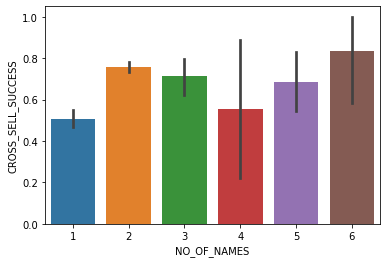

In [21]:
sns.barplot(y = original_df['CROSS_SELL_SUCCESS'],
                x = original_df['NO_OF_NAMES'])
plt.xlabel('NO_OF_NAMES')
plt.show()

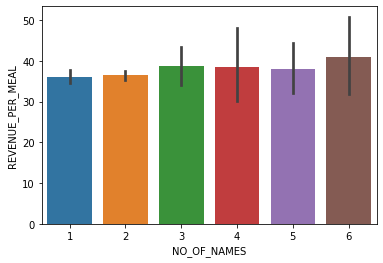

In [22]:
sns.barplot(y = original_df['REVENUE_PER_MEAL'],
                x = original_df['NO_OF_NAMES'])
plt.xlabel('NO_OF_NAMES')
plt.show()

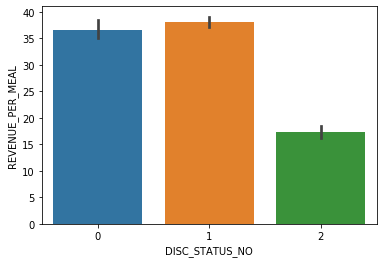

In [23]:
sns.barplot(y = original_df['REVENUE_PER_MEAL'],
                x = original_df['DISC_STATUS_NO'])
plt.xlabel('DISC_STATUS_NO')
plt.show()

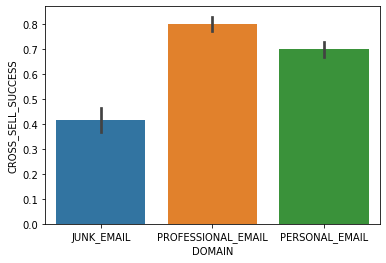

In [24]:
sns.barplot(y = original_df['CROSS_SELL_SUCCESS'],
                x = original_df['DOMAIN'])
plt.xlabel('DOMAIN')
plt.show()

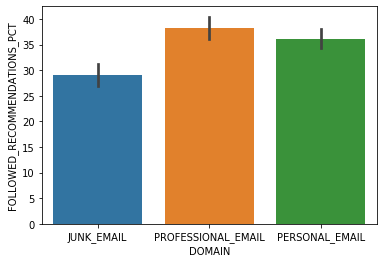

In [25]:
sns.barplot(y = original_df['FOLLOWED_RECOMMENDATIONS_PCT'],
                x = original_df['DOMAIN'])
plt.xlabel('DOMAIN')
plt.show()

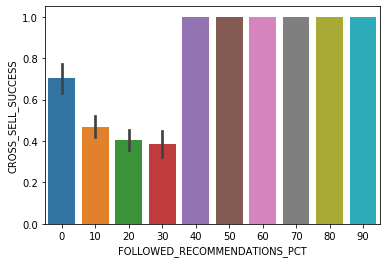

In [26]:
sns.barplot(y = original_df['CROSS_SELL_SUCCESS'],
                x = original_df['FOLLOWED_RECOMMENDATIONS_PCT'])
plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')
plt.show()

In [27]:
t=original_df.groupby('DOMAIN')
p=t.get_group('PROFESSIONAL_EMAIL')
stat = pd.get_dummies(p['EMAIL_DOMAIN'])
p = p.join([stat])

In [28]:
pcompany=p.loc[:,['CROSS_SELL_SUCCESS','amex.com', 'apple.com', 'boeing.com', 'caterpillar.com', 'chevron.com', 'cisco.com', 'cocacola.com', 'disney.com', 'dupont.com', 'exxon.com', 'ge.org', 'goldmansacs.com', 'homedepot.com', 'ibm.com', 'intel.com', 'jnj.com', 'jpmorgan.com', 
         'mcdonalds.com', 'merck.com', 'microsoft.com', 'mmm.com', 
         'nike.com', 'pfizer.com', 'pg.com', 'travelers.com', 'unitedhealth.com',
         'unitedtech.com', 'verizon.com', 'visa.com', 'walmart.com']]

In [29]:
pcompany_corr = pcompany.corr()
print(pcompany_corr.loc['CROSS_SELL_SUCCESS'].sort_values(ascending = False))

CROSS_SELL_SUCCESS    1.000000
merck.com             0.083986
microsoft.com         0.077112
pg.com                0.069711
jpmorgan.com          0.061633
intel.com             0.055762
amex.com              0.052936
caterpillar.com       0.028628
unitedhealth.com      0.015621
goldmansacs.com       0.013468
unitedtech.com        0.013468
verizon.com           0.008087
walmart.com           0.004075
pfizer.com           -0.000124
cocacola.com         -0.007463
mcdonalds.com        -0.007463
boeing.com           -0.008175
cisco.com            -0.009174
apple.com            -0.011311
nike.com             -0.011311
mmm.com              -0.012455
ge.org               -0.015303
visa.com             -0.021636
travelers.com        -0.023771
ibm.com              -0.034255
dupont.com           -0.034255
disney.com           -0.037944
chevron.com          -0.038764
jnj.com              -0.062332
exxon.com            -0.063164
homedepot.com        -0.083928
Name: CROSS_SELL_SUCCESS, dtype: float6

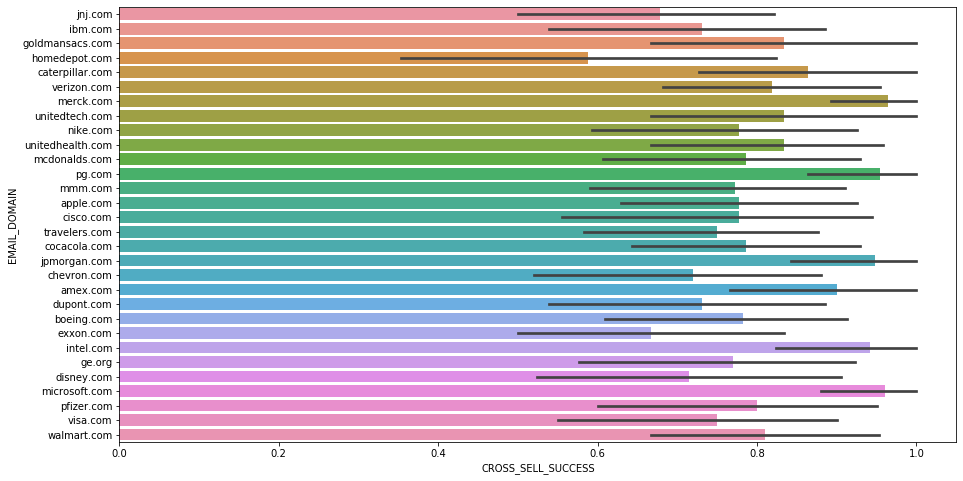

In [30]:
#professional_email_domains
fig, ax = plt.subplots(figsize = (15, 8))
sns.barplot(y = p['EMAIL_DOMAIN'],
                x = p['CROSS_SELL_SUCCESS'])
plt.xlabel('CROSS_SELL_SUCCESS')
plt.show()